
A sample hydrodynamic model in 3D is presented below.


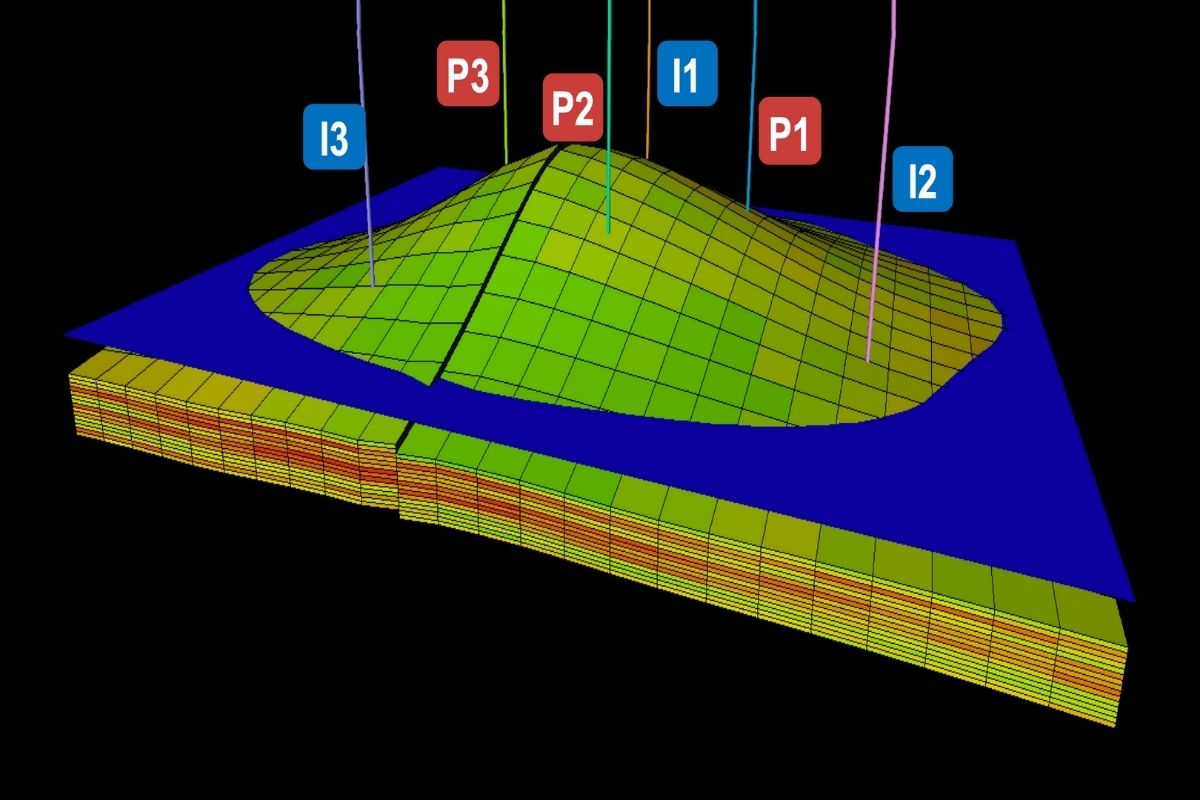

**Model building** \
The following well parameters were chosen as input data for model training:


* *Cum oil*: accumulated oil production

* *Days*: the number of days of operation of the well (until the moment of flooding (and its stopping due to unprofitability) or until the current moment if the well is in operation).

* *In prod*: the well is in operation/stopped due to flooding

* *Q oil*: current oil flow rate

* *wct*: current water availability

* *Top perf*: the depth of the top of the perforation interval - the depth of the top and bottom

* *Bottom perf*: depth of the bottom of the perforation interval

* *ST:* 0 - main bore, 1 - side bore

* *x, y*: coordinates of the well



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pylab
from pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DATA_SETS/art_df.xlsx')
df

,Well,ST,Cum prod,Days,In prod,Q oil,wct,Top perf,Bottom perf,x,y
0,Well-1,0,238664.8,1619,1,489.402060,15.3,-2527.00,-2564.00,524145.02600,5.641074e+06
1,Well-2,0,277066.4,1808,1,138.328155,8.2,-2532.30,-2558.30,524081.14400,5.641253e+06
2,Well-3,0,59582.4,566,0,0.000000,100.0,-2671.29,-2684.25,524131.34300,5.640786e+06
3,Well-4,0,167831.2,1540,0,0.000000,100.0,-2557.90,-2626.90,524280.75000,5.641674e+06
4,Well-5,1,9214.8,189,1,362.064735,43.9,-2535.00,-2559.00,524338.87300,5.641487e+06
5,Well-6,0,182646.4,1473,0,0.000000,100.0,-2567.50,-2573.50,524508.49100,5.641896e+06
6,Well-7,0,262283.6,1613,1,338.000000,81.5,-2516.00,-2533.50,524637.84900,5.642186e+06
7,Well-8,0,81975.2,1461,0,0.000000,100.0,-2517.70,-2541.10,524689.00200,5.642786e+06
8,Well-9,0,73682.6,1784,1,129.862549,88.2,-2532.13,-2541.12,524973.41800,5.643400e+06
9,Well-10,0,12882.2,438,0,0.000000,100.0,-2701.81,-2742.18,525143.07400,5.643242e+06


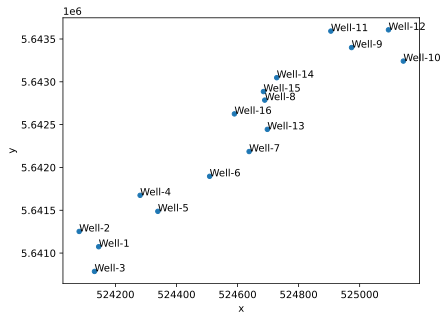

In [ ]:
ax = df.plot(kind='scatter', x='x', y='y')
df[['x','y','Well']].apply(lambda row: ax.text(*row),axis=1);
rcParams['figure.figsize'] = [11, 8]

In [ ]:
distance = pd.DataFrame(euclidean_distances(df[['x', 'y']]))
distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,189.421106,288.716421,615.262717,456.372864,898.857800,1215.932267,1796.219742,2468.770961,2386.388418,2630.198784,2704.505620,1477.629961,2058.102461,1890.507206,1613.473161
1,189.421106,0.000000,469.407884,466.628981,348.670679,772.699987,1086.688925,1649.621659,2325.320321,2255.028391,2480.527815,2562.877209,1342.044720,1908.469405,1741.457691,1463.841835
2,288.716421,469.407884,0.000000,900.972335,731.601740,1172.782918,1488.784179,2076.542229,2746.315419,2656.273901,2911.075881,2980.661690,1752.805451,2339.555698,2171.905805,1895.628194
3,615.262717,466.628981,900.972335,0.000000,195.774972,318.032440,623.801585,1184.350737,1859.369003,1789.085861,2016.954562,2096.609203,875.857537,1444.686145,1277.295668,999.812373
4,456.372864,348.670679,731.601740,195.774972,0.000000,442.717650,759.726354,1345.080138,2015.001471,1930.030184,2179.639701,2249.889550,1022.273019,1608.420761,1440.799154,1165.147639
5,898.857800,772.699987,1172.782918,318.032440,442.717650,0.000000,317.076286,907.900749,1573.786734,1487.697361,1741.614700,1807.881205,580.026491,1172.420868,1005.302778,733.402963
6,1215.932267,1086.688925,1488.784179,623.801585,759.726354,317.076286,0.000000,602.461546,1259.578709,1170.705311,1431.512178,1492.367717,265.661865,866.877127,701.808484,442.034170
7,1796.219742,1649.621659,2076.542229,1184.350737,1345.080138,907.900749,602.461546,0.000000,676.465868,643.371445,834.559731,915.208175,341.512674,264.790129,100.042061,189.060599
8,2468.770961,2325.320321,2746.315419,1859.369003,2015.001471,1573.786734,1259.578709,676.465868,0.000000,231.820015,203.812548,239.544905,994.231110,428.880556,589.345168,864.479741
9,2386.388418,2255.028391,2656.273901,1789.085861,1930.030184,1487.697361,1170.705311,643.371445,231.820015,0.000000,423.108119,367.995616,913.270777,457.902363,580.229349,828.558009


In [ ]:
well_names = df['Well']
distance.columns = well_names

In [ ]:
df_distance = pd.concat([df.drop(['x', 'y'], axis=1), distance], axis=1)
df_distance

,Well,ST,Cum prod,Days,In prod,Q oil,wct,Top perf,Bottom perf,Well-1,...,Well-7,Well-8,Well-9,Well-10,Well-11,Well-12,Well-13,Well-14,Well-15,Well-16
0,Well-1,0,238664.8,1619,1,489.402060,15.3,-2527.00,-2564.00,0.000000,...,1215.932267,1796.219742,2468.770961,2386.388418,2630.198784,2704.505620,1477.629961,2058.102461,1890.507206,1613.473161
1,Well-2,0,277066.4,1808,1,138.328155,8.2,-2532.30,-2558.30,189.421106,...,1086.688925,1649.621659,2325.320321,2255.028391,2480.527815,2562.877209,1342.044720,1908.469405,1741.457691,1463.841835
2,Well-3,0,59582.4,566,0,0.000000,100.0,-2671.29,-2684.25,288.716421,...,1488.784179,2076.542229,2746.315419,2656.273901,2911.075881,2980.661690,1752.805451,2339.555698,2171.905805,1895.628194
3,Well-4,0,167831.2,1540,0,0.000000,100.0,-2557.90,-2626.90,615.262717,...,623.801585,1184.350737,1859.369003,1789.085861,2016.954562,2096.609203,875.857537,1444.686145,1277.295668,999.812373
4,Well-5,1,9214.8,189,1,362.064735,43.9,-2535.00,-2559.00,456.372864,...,759.726354,1345.080138,2015.001471,1930.030184,2179.639701,2249.889550,1022.273019,1608.420761,1440.799154,1165.147639
5,Well-6,0,182646.4,1473,0,0.000000,100.0,-2567.50,-2573.50,898.857800,...,317.076286,907.900749,1573.786734,1487.697361,1741.614700,1807.881205,580.026491,1172.420868,1005.302778,733.402963
6,Well-7,0,262283.6,1613,1,338.000000,81.5,-2516.00,-2533.50,1215.932267,...,0.000000,602.461546,1259.578709,1170.705311,1431.512178,1492.367717,265.661865,866.877127,701.808484,442.034170
7,Well-8,0,81975.2,1461,0,0.000000,100.0,-2517.70,-2541.10,1796.219742,...,602.461546,0.000000,676.465868,643.371445,834.559731,915.208175,341.512674,264.790129,100.042061,189.060599
8,Well-9,0,73682.6,1784,1,129.862549,88.2,-2532.13,-2541.12,2468.770961,...,1259.578709,676.465868,0.000000,231.820015,203.812548,239.544905,994.231110,428.880556,589.345168,864.479741
9,Well-10,0,12882.2,438,0,0.000000,100.0,-2701.81,-2742.18,2386.388418,...,1170.705311,643.371445,231.820015,0.000000,423.108119,367.995616,913.270777,457.902363,580.229349,828.558009


In [ ]:
df_train_1 = df_distance.drop([12, 13, 14, 15], axis=0)
df_train_1

,Well,ST,Cum prod,Days,In prod,Q oil,wct,Top perf,Bottom perf,Well-1,...,Well-7,Well-8,Well-9,Well-10,Well-11,Well-12,Well-13,Well-14,Well-15,Well-16
0,Well-1,0,238664.8,1619,1,489.402060,15.3,-2527.00,-2564.00,0.000000,...,1215.932267,1796.219742,2468.770961,2386.388418,2630.198784,2704.505620,1477.629961,2058.102461,1890.507206,1613.473161
1,Well-2,0,277066.4,1808,1,138.328155,8.2,-2532.30,-2558.30,189.421106,...,1086.688925,1649.621659,2325.320321,2255.028391,2480.527815,2562.877209,1342.044720,1908.469405,1741.457691,1463.841835
2,Well-3,0,59582.4,566,0,0.000000,100.0,-2671.29,-2684.25,288.716421,...,1488.784179,2076.542229,2746.315419,2656.273901,2911.075881,2980.661690,1752.805451,2339.555698,2171.905805,1895.628194
3,Well-4,0,167831.2,1540,0,0.000000,100.0,-2557.90,-2626.90,615.262717,...,623.801585,1184.350737,1859.369003,1789.085861,2016.954562,2096.609203,875.857537,1444.686145,1277.295668,999.812373
4,Well-5,1,9214.8,189,1,362.064735,43.9,-2535.00,-2559.00,456.372864,...,759.726354,1345.080138,2015.001471,1930.030184,2179.639701,2249.889550,1022.273019,1608.420761,1440.799154,1165.147639
5,Well-6,0,182646.4,1473,0,0.000000,100.0,-2567.50,-2573.50,898.857800,...,317.076286,907.900749,1573.786734,1487.697361,1741.614700,1807.881205,580.026491,1172.420868,1005.302778,733.402963
6,Well-7,0,262283.6,1613,1,338.000000,81.5,-2516.00,-2533.50,1215.932267,...,0.000000,602.461546,1259.578709,1170.705311,1431.512178,1492.367717,265.661865,866.877127,701.808484,442.034170
7,Well-8,0,81975.2,1461,0,0.000000,100.0,-2517.70,-2541.10,1796.219742,...,602.461546,0.000000,676.465868,643.371445,834.559731,915.208175,341.512674,264.790129,100.042061,189.060599
8,Well-9,0,73682.6,1784,1,129.862549,88.2,-2532.13,-2541.12,2468.770961,...,1259.578709,676.465868,0.000000,231.820015,203.812548,239.544905,994.231110,428.880556,589.345168,864.479741
9,Well-10,0,12882.2,438,0,0.000000,100.0,-2701.81,-2742.18,2386.388418,...,1170.705311,643.371445,231.820015,0.000000,423.108119,367.995616,913.270777,457.902363,580.229349,828.558009


In [ ]:
df_test_1 = df_distance.loc[[12, 13]]
df_test_1

,Well,ST,Cum prod,Days,In prod,Q oil,wct,Top perf,Bottom perf,Well-1,...,Well-7,Well-8,Well-9,Well-10,Well-11,Well-12,Well-13,Well-14,Well-15,Well-16
12,Well-13,0,189488.2,1522,0,0.0,100.0,-2515.05,-2528.05,1477.629961,...,265.661865,341.512674,994.231110,913.270777,1166.089706,1227.856257,0.000000,604.054103,441.542936,210.260488
13,Well-14,0,134580.8,1516,1,373.0,80.8,-2521.98,-2588.96,2058.102461,...,866.877127,264.790129,428.880556,457.902363,572.268417,667.942740,604.054103,0.000000,167.651680,444.874811


In [ ]:
x_1 = df_train_1.drop(['Well', 'wct'], axis=1)
x_1

,ST,Cum prod,Days,In prod,Q oil,Top perf,Bottom perf,Well-1,Well-2,Well-3,...,Well-7,Well-8,Well-9,Well-10,Well-11,Well-12,Well-13,Well-14,Well-15,Well-16
0,0,238664.8,1619,1,489.402060,-2527.00,-2564.00,0.000000,189.421106,288.716421,...,1215.932267,1796.219742,2468.770961,2386.388418,2630.198784,2704.505620,1477.629961,2058.102461,1890.507206,1613.473161
1,0,277066.4,1808,1,138.328155,-2532.30,-2558.30,189.421106,0.000000,469.407884,...,1086.688925,1649.621659,2325.320321,2255.028391,2480.527815,2562.877209,1342.044720,1908.469405,1741.457691,1463.841835
2,0,59582.4,566,0,0.000000,-2671.29,-2684.25,288.716421,469.407884,0.000000,...,1488.784179,2076.542229,2746.315419,2656.273901,2911.075881,2980.661690,1752.805451,2339.555698,2171.905805,1895.628194
3,0,167831.2,1540,0,0.000000,-2557.90,-2626.90,615.262717,466.628981,900.972335,...,623.801585,1184.350737,1859.369003,1789.085861,2016.954562,2096.609203,875.857537,1444.686145,1277.295668,999.812373
4,1,9214.8,189,1,362.064735,-2535.00,-2559.00,456.372864,348.670679,731.601740,...,759.726354,1345.080138,2015.001471,1930.030184,2179.639701,2249.889550,1022.273019,1608.420761,1440.799154,1165.147639
5,0,182646.4,1473,0,0.000000,-2567.50,-2573.50,898.857800,772.699987,1172.782918,...,317.076286,907.900749,1573.786734,1487.697361,1741.614700,1807.881205,580.026491,1172.420868,1005.302778,733.402963
6,0,262283.6,1613,1,338.000000,-2516.00,-2533.50,1215.932267,1086.688925,1488.784179,...,0.000000,602.461546,1259.578709,1170.705311,1431.512178,1492.367717,265.661865,866.877127,701.808484,442.034170
7,0,81975.2,1461,0,0.000000,-2517.70,-2541.10,1796.219742,1649.621659,2076.542229,...,602.461546,0.000000,676.465868,643.371445,834.559731,915.208175,341.512674,264.790129,100.042061,189.060599
8,0,73682.6,1784,1,129.862549,-2532.13,-2541.12,2468.770961,2325.320321,2746.315419,...,1259.578709,676.465868,0.000000,231.820015,203.812548,239.544905,994.231110,428.880556,589.345168,864.479741
9,0,12882.2,438,0,0.000000,-2701.81,-2742.18,2386.388418,2255.028391,2656.273901,...,1170.705311,643.371445,231.820015,0.000000,423.108119,367.995616,913.270777,457.902363,580.229349,828.558009


In [ ]:
y_1 = df_train_1['wct']
y_test_1 = df_test_1['wct']

In [ ]:
x_test_1 = df_test_1.drop(['Well', 'wct'], axis=1)

model = RandomForestRegressor(random_state=42, max_depth=14)
model.fit(x_1, y_1)

y_pred_train_1 = model.predict(x_1)
y_pred_1 = model.predict(x_test_1)

print('Predicted values from train data:')
r2_train = r2(y_1, y_pred_train_1)
mae_train = mae(y_1, y_pred_train_1)
mse_train = mse(y_1, y_pred_train_1)
print(f'R2 train: {r2_train.round(4)}')
print(f'MAE train: {mae_train.round(4)}')
print(f'MSE train: {mse_train.round(4)}')

print('Predicted values from test data:')
r2_test = r2(y_test_1, y_pred_1)
mae_test = mae(y_test_1, y_pred_1)
mse_test = mse(y_test_1, y_pred_1)
print(f'R2 test: {r2_test.round(4)}')
print(f'MAE test: {mae_test.round(4)}')
print(f'MSE test: {mse_test.round(4)}')

model

Predicted values from train data:
R2 train: 0.8832
MAE train: 8.2855
MSE train: 131.1208
Predicted values from test data:
R2 test: 0.8758
MAE test: 3.164
MSE test: 11.4485


RandomForestRegressor(max_depth=14, random_state=42)

In [ ]:
df_y_test = pd.DataFrame({'Well': df_test_1['Well'],
                          'wct predicted, %': y_pred_1.round(1),
                          'wct actual, %': y_test_1.round(1),
                          'difference': (y_pred_1 - y_test_1).round(1)})
df_y_test

,Well,"wct predicted, %","wct actual, %",difference
12,Well-13,95.6,100.0,-4.4
13,Well-14,78.8,80.8,-2.0


In [ ]:
round(sum(abs(y_pred_train_1 - y_1)) / len(y_1), 1)

8.3

In [ ]:
df_train_2 = df_distance.drop([14, 15], axis=0)

In [ ]:
df_fc = df_distance.loc[[14, 15]]

In [ ]:
x_2 = df_train_2.drop(['Well', 'wct'], axis=1)

In [ ]:
y_2 = df_train_2['wct']
x_fc = df_fc.drop(['Well', 'wct'], axis=1)

model = RandomForestRegressor(random_state=42, max_depth=14)
model.fit(x_2, y_2)

y_pred_train_2 = model.predict(x_2)
y_fc = model.predict(x_fc)

print('Predicted values from train data:')
r2_train = r2(y_2, y_pred_train_2)
mae_train = mae(y_2, y_pred_train_2)
mse_train = mse(y_2, y_pred_train_2)
print(f'R2 train: {r2_train.round(4)}')
print(f'MAE train: {mae_train.round(4)}')
print(f'MSE train: {mse_train.round(4)}')

print('Forecasted values could be compared with real data!')

model

Predicted values from train data:
R2 train: 0.9095
MAE train: 6.5196
MSE train: 89.9625
Forecasted values could be compared with real data!


RandomForestRegressor(max_depth=14, random_state=42)

In [ ]:
df_y_train = pd.DataFrame({'Well': df_train_2['Well'],
                           'wct predicted, %': y_pred_train_2.round(1),
                           'wct actual, %': y_2.round(1),
                           'difference': (y_pred_train_2 - y_2).round(1)})
df_y_train

,Well,"wct predicted, %","wct actual, %",difference
0,Well-1,29.8,15.3,14.5
1,Well-2,27.3,8.2,19.1
2,Well-3,79.1,100.0,-20.9
3,Well-4,88.8,100.0,-11.2
4,Well-5,52.6,43.9,8.7
5,Well-6,95.9,100.0,-4.1
6,Well-7,78.0,81.5,-3.5
7,Well-8,97.6,100.0,-2.4
8,Well-9,88.1,88.2,-0.1
9,Well-10,98.3,100.0,-1.7


In [ ]:
round(sum(abs(y_pred_train_2 - y_2)) / len(y_2), 1)

6.5

In [ ]:
df_y_test = pd.DataFrame({'Well': df_test_1['Well'],
                          'wct predicted, %': y_pred_1.round(1),
                          'wct actual, %': y_test_1.round(1),
                          'difference': (y_pred_1 - y_test_1).round(1)})
df_y_test

,Well,"wct predicted, %","wct actual, %",difference
12,Well-13,95.6,100.0,-4.4
13,Well-14,78.8,80.8,-2.0


In [ ]:
model.feature_importances_
feature_importances = pd.DataFrame()
feature_importances['feature_name'] = x_2.columns.tolist()
feature_importances['importance'] = model.feature_importances_
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances

,feature_name,importance
8,Well-2,0.316979
4,Q oil,0.114375
7,Well-1,0.060369
11,Well-5,0.051927
2,Days,0.048485
1,Cum prod,0.045192
10,Well-4,0.039740
21,Well-15,0.037203
22,Well-16,0.036913
0,ST,0.036789


In [ ]:
fig = px.bar(feature_importances,
             x=feature_importances['importance'],
             y=feature_importances['feature_name'],
             title="Feature importances")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
fig = px.scatter(x=y_pred_train_2, y=y_2, title="True vs Predicted values",
                 text=df_train_2['Well'], width=850, height=800)
fig.add_trace(go.Scatter(x=[0,100], y=[0,100], mode='lines', name='True=Predicted',
                         line = dict(color='red', width=1, dash='dash')))
fig.update_xaxes(title_text='Predicted')
fig.update_yaxes(title_text='True')
fig.show()

**NOTE** \
This model has an important limitation. Any field has an oil-bearing contour - the area beyond which the drilled well will be "dry" - there is no oil there.

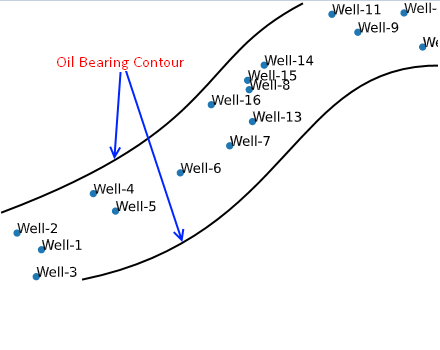